<a href="https://colab.research.google.com/github/pie575/IW-2023/blob/main/Copy_of_Copy_of_On_chain_defi_analytics_web3py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install web3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Setup
from web3 import Web3
from decimal import Decimal
from ens import ENS
import asyncio
import json
from hexbytes.main import HexBytes
# for time conversion
import datetime
import pytz
from datetime import date
import pandas as pd
import time

alchemy_url = "https://eth-mainnet.g.alchemy.com/v2/OPutfOp_VyXojpS6t3xDlHiUnWCX8D1e"
w3 = Web3(Web3.HTTPProvider(alchemy_url))
  
print(w3.isConnected())

True


In [ ]:
#@title collect all crypto exchange addresses
from google.colab import files
uploaded = files.upload()

Saving Centralized Exchange Wallet List - Sheet1.csv to Centralized Exchange Wallet List - Sheet1.csv


In [ ]:
# four kinds of institutional wallets: custodial institutions, CEX, trading firms, and miners. Exclude the first two and include the later two for now.

inFile = list(uploaded.keys())[0]
exchange_wallets = []
with open(inFile) as f:
    for row in f:
        exchange_wallets.append(row.split(',')[0].lower())

Circle_wallets = ['0x55fe002aeff02f77364de339a1292923a15844b8']
BitcoinSuisse_wallets = ['0x622de9bb9ff8907414785a633097db438f9a2d86', '0xdd9663bd979f1ab1bada85e1bc7d7f13cafe71f8', '0xec70e3c8afe212039c3f6a2df1c798003bf7cfe9', '0x3837ea2279b8e5c260a78f5f4181b783bbe76a8b', '0x2a7077399b3e90f5392d55a1dc7046ad8d152348', '0xc2288b408dc872a1546f13e6ebfa9c94998316a2']
custodian_wallets = list(set().union(Circle_wallets, BitcoinSuisse_wallets))
Multichain_bridge = ['0x13B432914A996b0A48695dF9B2d701edA45FF264']
bridge_wallets = Multichain_bridge

null_addresses = ['0x000000000000000000000000000000000000dead', '0x0000000000000000000000000000000000000000', '0x0000000000000000000000000000000000000001', '0x0000000000000000000000000000000000000002', '0x0000000000000000000000000000000000000003',
                '0x0000000000000000000000000000000000000004', '0x0000000000000000000000000000000000000005', '0x0000000000000000000000000000000000000006', '0x0000000000000000000000000000000000000007', '0x0000000000000000000000000000000000000008',
                '0x0000000000000000000000000000000000000009', '0x00000000000000000000045261d4ee77acdb3286', '0x0123456789012345678901234567890123456789', '0x1111111111111111111111111111111111111111', '0x1234567890123456789012345678901234567890',
                '0x2222222222222222222222222222222222222222', '0x3333333333333333333333333333333333333333', '0x4444444444444444444444444444444444444444', '0x6666666666666666666666666666666666666666', '0x8888888888888888888888888888888888888888',
                '0xbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbb', '0xdead000000000000000042069420694206942069', '0xeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeee', '0xffffffffffffffffffffffffffffffffffffffff', '0xaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa']

In [ ]:
import random

block_txlist = []
addresses = set()

# randomly sample blocks from the first block in 2022 to the latest block
latest_block = w3.eth.get_block('latest')['number']
sample_blocks = random.sample(list(range(13916166,latest_block)), 10)
excluded_wallets = list(set().union(exchange_wallets, null_addresses, custodian_wallets, bridge_wallets))
for nonce in sample_blocks: # takes 26min to go through 40 blocks/8853 txs, and 10 minutes to go through 7000 wallets
  block = w3.eth.getBlock(nonce)
  block_transactions = block['transactions']

  for tx in block_transactions:
    getTrans = Web3.toJSON(tx).strip('"')
    trans = w3.eth.get_transaction(getTrans)
    try:
      _from = trans['from']
      _to = trans['to']
      # only append wallet addresses that are not contract addresses or exchange wallets
      if w3.eth.get_code(_from) == HexBytes("0x") and _from.lower() not in excluded_wallets:
        addresses.add(_from)
      if w3.eth.get_code(_to) == HexBytes("0x") and _to.lower() not in excluded_wallets:
        addresses.add(_to)
    except KeyError:
      print("ignore the invalid transaction with hash", trans['hash'].hex())

print("we found a total of", len(addresses), "unique addresses")

# recreate the state of all the addresses
state = dict()
for address in addresses:
  balance = w3.fromWei(w3.eth.get_balance(address),'tether')
  state[address] = balance

sorted_state = sorted(state, key=state.get, reverse=True)
selected_addresses = sorted_state[:int(len(sorted_state)*0.05)]
print(selected_addresses)
print("we take 5% of the total wallets by balance and limit to a total of", len(selected_addresses), "whales addresses")

we found a total of 2186 unique addresses
['0x7c195D981AbFdC3DDecd2ca0Fed0958430488e34', '0xD7efCbB86eFdD9E8dE014dafA5944AaE36E817e4', '0x6081258689a75d253d87cE902A8de3887239Fe80', '0xCD531Ae9EFCCE479654c4926dec5F6209531Ca7b', '0x4f6742bADB049791CD9A37ea913f2BAC38d01279', '0xe688b84b23f322a994A53dbF8E15FA82CDB71127', '0x95A9bd206aE52C4BA8EecFc93d18EACDd41C88CC', '0x44AfFdf87ABfb1DBa08e444141bD21B4380FA35F', '0xeB6c4bE4b92a52e969F4bF405025D997703D5383', '0x6dfc34609a05bC22319fA4Cce1d1E2929548c0D7', '0x974CaA59e49682CdA0AD2bbe82983419A2ECC400', '0xf0CF6b2af598c1f2909E148cbc5F5cc7c27b878b', '0xB8001C3eC9AA1985f6c747E25c28324E4A361ec1', '0x292f04a44506c2fd49Bac032E1ca148C35A478c8', '0x57d4E9B4a191D2bbA64Abd6C9250a500e29eeA74', '0x3b7A0869D228AD5C154b922CD7a7CB1C46FE6eD4', '0x9C19B0497997Fe9E75862688a295168070456951', '0x42D17b7f3532Ec2f7C4E4e5E239BAA476846E2CD', '0x2a45907f94df93388801AE72fE810eac75926a1d', '0x1C727a55eA3c11B0ab7D3a361Fe0F3C47cE6de5d', '0x8AbAB939cC1e72C4147642111b5778CFEa

In [ ]:
#@title Implement convert_date_to_blockNumber(_date) 
# get block at timestamp. cited from https://github.com/ethereum/web3.py/issues/1872#issuecomment-932675448
def search_block_number(timestamp):
    target_timestamp = timestamp
    averageBlockTime = 15.1
    block = w3.eth.getBlock('latest')
    blockNumber = block['number']
    blockTime = block['timestamp']
    lowerLimitStamp = target_timestamp
    higherLimitStamp = target_timestamp + 30
    requestsMade = 1

    while blockTime > target_timestamp:
        decreaseBlocks = int((blockTime - target_timestamp) / averageBlockTime)
        if decreaseBlocks < 1:
            break
        blockNumber -= decreaseBlocks
        block = w3.eth.getBlock(blockNumber)
        blockTime = block['timestamp']
        requestsMade += 1

    if blockTime < lowerLimitStamp:
        while blockTime < lowerLimitStamp:
            blockNumber += 1
            block = w3.eth.getBlock(blockNumber)
            blockTime = block['timestamp']
            requestsMade += 1
    
    if blockTime > higherLimitStamp:
         while blockTime > lowerLimitStamp:
            blockNumber -= 1
            block = w3.eth.getBlock(blockNumber)
            blockTime = block['timestamp']
            requestsMade += 1       
    
    return blockNumber

def convert_date_to_blockNumber(_date):
  date_string = _date.isoformat()
  timestamp = time.mktime(datetime.datetime.strptime(date_string,"%Y-%m-%d").timetuple())
  block = search_block_number(timestamp)
  return block


In [ ]:
#@title testing the exchange flow code
# selected_addresses = [
# '0xb739D0895772DBB71A89A3754A160269068f0D45']

# import requests
# import certifi

# # transaction = w3.eth.get_transaction('0x622d937afb91c7027477c3b01e2a81d59b1520ccede30def2a4afca7a8e4bb1f')
# # print([float(transaction.get('value'))/1000000000000000000.0])
# # print(transaction)
# # timestamp = transaction.get('timeStamp')
# # print(timestamp)
# # tx_date = datetime.datetime.fromtimestamp(int(timestamp), tz=pytz.utc).strftime("%Y/%m/%d") # timestamp fucked up
# # print(tx_date)

# # transaction = w3.eth.get_transaction('0xe8d888daa7efcd1ffc9b729c6600ccb82c8c2c170a28a578d75b26476c633e38')
# # timestamp = transaction.get('timeStamp')
# # tx_date = datetime.datetime.fromtimestamp(int(timestamp), tz=pytz.utc).strftime("%Y/%m/%d")

# # prev_date = date(2000, 1, 1).strftime("%Y/%m/%d") # create a dummy prev_date string
# # print(tx_date, prev_date)

# url = "https://api.etherscan.io/api?module=account&action=txlist&address=" + '0xb739d0895772dbb71a89a3754a160269068f0d45' + "&startblock=" + str(16280000) + "&endblock=" + str(16285253) + "&page=1&sort=desc&apikey=SKMKXN954GUHUYBF5JFKHS7I1M8IK5SXQP"
# response = requests.get(url, verify=certifi.where())
# address_content = response.json()
# result = address_content.get('result')
# prev_date = date(2000, 1, 1).strftime("%Y/%m/%d") # create a dummy prev_date string
# print("prev date", prev_date)

# for n, transaction in enumerate(result):
#   hash = transaction.get('hash')
#   timestamp = transaction.get('timeStamp')
#   tx_date = datetime.datetime.fromtimestamp(int(timestamp), tz=pytz.utc).strftime("%Y/%m/%d") 
#   print('prev date', prev_date)
#   print("tx date", tx_date, 'with hash', hash)
#   print(tx_date == prev_date)
#   prev_date = tx_date



In [ ]:
from google.colab import files
uploaded = files.upload()
inFile = list(uploaded.keys())[0]
selected_addresses = []
with open(inFile) as f:
    for row in f:
        selected_addresses.append(row.split(',')[0].lower())


Saving Whale wallets - current whales-3.csv to Whale wallets - current whales-3.csv


In [ ]:
#@title Track Whales Net Exchange Flow
# find these wallets interactions with the exchanges
import requests
import certifi
import matplotlib.pyplot as plt
import statistics

def get_exchange_flow_by_address(address, startblock, endblock, hashmap):
  url = "https://api.etherscan.io/api?module=account&action=txlist&address=" + address + "&startblock=" + str(startblock) + "&endblock=" + str(endblock) + "&page=1&sort=desc&apikey=VQIYPTPDYJQDCHC8YSU5UIKCPBJ6PMFYIY"

  response = requests.get(url, verify=certifi.where())
  address_content = response.json()
  result = address_content.get('result')

  exchange_inflow = 0
  exchange_outflow = 0
  new_endblock = 0
  prev_date_in = date(2000, 1, 1).strftime("%Y/%m/%d") # create a dummy date string for the previous date of transferring to an exchange
  prev_date_out = date(2000, 1, 1).strftime("%Y/%m/%d") # create a dummy date string for the previous date of transferring out of an exchange
  print('status is: ' + str(address_content.get('status')))

  if int(startblock) > int(endblock):
    print("Reeeeeee startblock endblock error")
    return (0,0)

  while address_content.get('status') != '1':
    print('Retrying, status is: ' + str(address_content.get('status')))
    response = requests.get(url, verify=certifi.where())
    address_content = response.json()
    result = address_content.get('result')
  
  if len(result) == 0:
    return (0,0)

  for n, transaction in enumerate(result):
    tx_from = transaction.get('from').lower()
    tx_to = transaction.get('to').lower()
    eth_value = float(transaction.get('value'))/1000000000000000000.0
    # value_in_usd = w3.fromWei(w3.eth.get_transaction(hash)['value'],'tether')
    hash = transaction.get('hash')
    timestamp = transaction.get('timeStamp')
    tx_date = datetime.datetime.fromtimestamp(int(timestamp), tz=pytz.utc).strftime("%Y/%m/%d")
    if tx_from in exchange_wallets:
      hashmap[tx_date][0] -= eth_value # exchange outflow
      if tx_date != prev_date_out: # only increment "from exchange" whale count once for this address on one day
        hashmap[tx_date][1] -= 1
      # print("found a outflow! tx hash: ", hash, "tx date is ", tx_date, "prev date out is", prev_date_out, "does tx date = prev date out?", tx_date == prev_date_out)
      prev_date_out = tx_date
    if tx_to in exchange_wallets:
      hashmap[tx_date][0] += eth_value # exchange inflow
      if tx_date != prev_date_in: # only increment "to exchange" whale count once for this address on one day
        hashmap[tx_date][2] += 1
      # print("found a inflow! tx hash: ", hash, "tx date is ", tx_date, "prev date in is", prev_date_in, "does tx date = prev date in?", tx_date == prev_date_in)
      prev_date_in = tx_date # update the previous date
    if n == 9999:
      new_endblock = transaction.get('blockNumber')
  return(n, new_endblock)

start_date = date(2022, 1, 1)
end_date = date(2022, 12, 31)
end_date_next_date = date(2023, 1, 1)
start_block = convert_date_to_blockNumber(start_date)
end_block = convert_date_to_blockNumber(end_date_next_date) # starts from the first block in 2022 and ends in the first block in 2023

hashmap = dict() # hashmap records net exchange inflow and outflows
daterange = pd.date_range(start_date, end_date)
for single_date in daterange:
  hashmap[single_date.strftime("%Y/%m/%d")] = [0,0,0] # mapping from date to [net flow, #whales transfering out of exchanges, #whales transfering to exchanges]
print(hashmap)

# selected_addresses = ['0xB8001C3eC9AA1985f6c747E25c28324E4A361ec1', '0xD7efCbB86eFdD9E8dE014dafA5944AaE36E817e4', '0x6081258689a75d253d87cE902A8de3887239Fe80', '0xCD531Ae9EFCCE479654c4926dec5F6209531Ca7b', '0x4f6742bADB049791CD9A37ea913f2BAC38d01279']
for address in selected_addresses:
  record_executed, new_endblock = get_exchange_flow_by_address(address, start_block, end_block, hashmap)
  round = 0
  while record_executed == 9999:
    record_executed, new_endblock = get_exchange_flow_by_address(address, start_block, new_endblock, hashmap)
    round += 1
  print('finished this address:', address, "with round", round)

print(hashmap)

dates = list(hashmap.keys())
net_flow = []
whales_outof_exchanges = []
whales_into_exchanges = []
net_inflow_excludezero = []
for value in hashmap.values():
  net_flow.append(value[0])
  if value[0] != 0:
    net_inflow_excludezero.append(value[0])
  whales_outof_exchanges.append(value[1])
  whales_into_exchanges.append(value[2])

median = statistics.median(net_inflow_excludezero)
mean = statistics.mean(net_inflow_excludezero)
print('median of the net exchange flow is', median)
print('mean of the net exchange flow is', mean)

print(net_flow)


{'2022/01/01': [0, 0, 0], '2022/01/02': [0, 0, 0], '2022/01/03': [0, 0, 0], '2022/01/04': [0, 0, 0], '2022/01/05': [0, 0, 0], '2022/01/06': [0, 0, 0], '2022/01/07': [0, 0, 0], '2022/01/08': [0, 0, 0], '2022/01/09': [0, 0, 0], '2022/01/10': [0, 0, 0], '2022/01/11': [0, 0, 0], '2022/01/12': [0, 0, 0], '2022/01/13': [0, 0, 0], '2022/01/14': [0, 0, 0], '2022/01/15': [0, 0, 0], '2022/01/16': [0, 0, 0], '2022/01/17': [0, 0, 0], '2022/01/18': [0, 0, 0], '2022/01/19': [0, 0, 0], '2022/01/20': [0, 0, 0], '2022/01/21': [0, 0, 0], '2022/01/22': [0, 0, 0], '2022/01/23': [0, 0, 0], '2022/01/24': [0, 0, 0], '2022/01/25': [0, 0, 0], '2022/01/26': [0, 0, 0], '2022/01/27': [0, 0, 0], '2022/01/28': [0, 0, 0], '2022/01/29': [0, 0, 0], '2022/01/30': [0, 0, 0], '2022/01/31': [0, 0, 0], '2022/02/01': [0, 0, 0], '2022/02/02': [0, 0, 0], '2022/02/03': [0, 0, 0], '2022/02/04': [0, 0, 0], '2022/02/05': [0, 0, 0], '2022/02/06': [0, 0, 0], '2022/02/07': [0, 0, 0], '2022/02/08': [0, 0, 0], '2022/02/09': [0, 0, 0],

['01/01', '01/02', '01/03', '01/04', '01/05', '01/06', '01/07', '01/08', '01/09', '01/10', '01/11', '01/12', '01/13', '01/14', '01/15', '01/16', '01/17', '01/18', '01/19', '01/20', '01/21', '01/22', '01/23', '01/24', '01/25', '01/26', '01/27', '01/28', '01/29', '01/30', '01/31', '02/01', '02/02', '02/03', '02/04', '02/05', '02/06', '02/07', '02/08', '02/09', '02/10', '02/11', '02/12', '02/13', '02/14', '02/15', '02/16', '02/17', '02/18', '02/19', '02/20', '02/21', '02/22', '02/23', '02/24', '02/25', '02/26', '02/27', '02/28', '03/01', '03/02', '03/03', '03/04', '03/05', '03/06', '03/07', '03/08', '03/09', '03/10', '03/11', '03/12', '03/13', '03/14', '03/15', '03/16', '03/17', '03/18', '03/19', '03/20', '03/21', '03/22', '03/23', '03/24', '03/25', '03/26', '03/27', '03/28', '03/29', '03/30', '03/31', '04/01', '04/02', '04/03', '04/04', '04/05', '04/06', '04/07', '04/08', '04/09', '04/10', '04/11', '04/12', '04/13', '04/14', '04/15', '04/16', '04/17', '04/18', '04/19', '04/20', '04/21', 

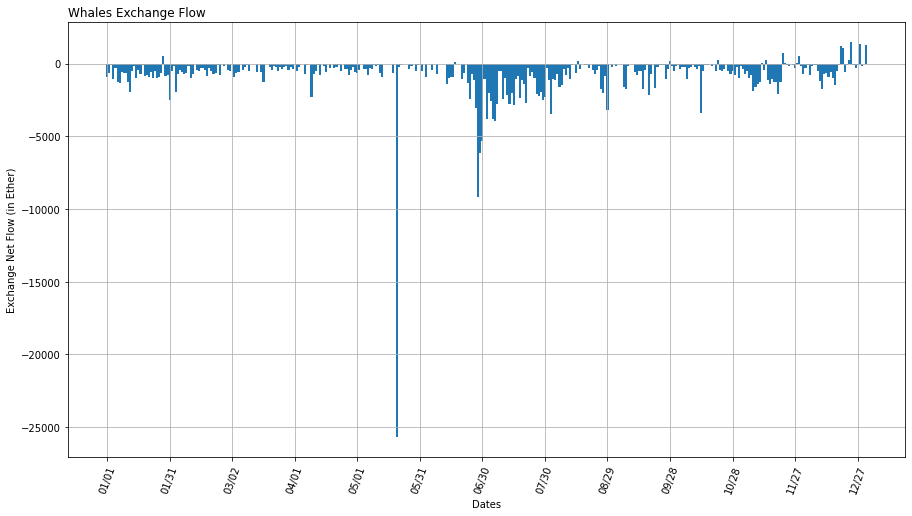

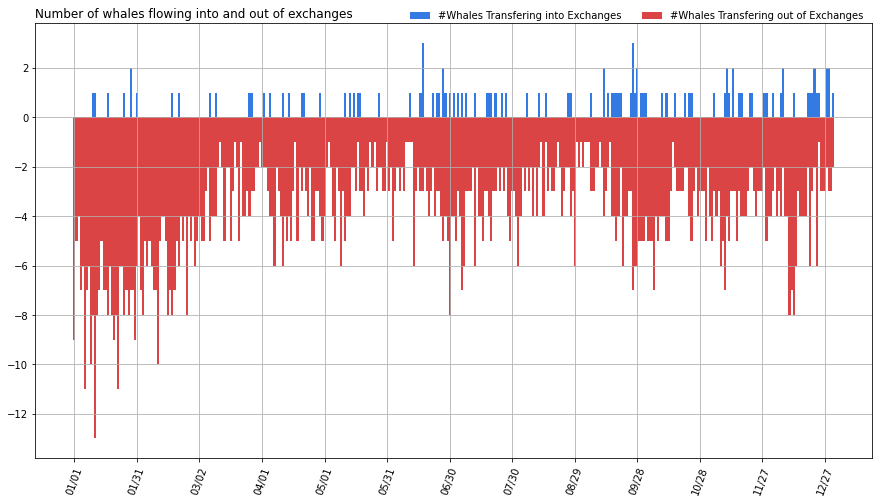

In [ ]:
# visualize net flow into the exchanges
dates = list(hashmap.keys())
dates = [e[5:] for e in dates]
print(dates)
plt.figure(figsize=(15, 8))
plt.bar(range(len(hashmap)), net_flow, width=1.0)
plt.xticks(rotation=70)
plt.xticks(range(0, len(dates), 30))
plt.xticks(range(0, len(dates), 30), dates[0::30])
plt.grid(True)


plt.xlabel('Dates')
plt.ylabel('Exchange Net Flow (in Ether)')
plt.title('Whales Exchange Flow', loc='left')
plt.show()

# find number of whales transferring out of and into exchanges
plt.figure(figsize=(15, 8))
plt.bar(dates, whales_into_exchanges, color = '#337AE3', width=1.0)
plt.bar(dates, whales_outof_exchanges, color = '#DB4444', width=1.0)
plt.xticks(rotation=70)
plt.xticks(range(0, len(dates), 30))
plt.xticks(range(0, len(dates), 30), dates[0::30])
plt.grid(True)
legend_label = ['#Whales Transfering into Exchanges', '#Whales Transfering out of Exchanges']
plt.legend(legend_label, ncol = 2, bbox_to_anchor=([1, 1.05, 0, 0]), frameon = False)
plt.title('Number of whales flowing into and out of exchanges ', loc='left')
plt.show()

{'2022/01/01': 0, '2022/01/02': 0, '2022/01/03': 0, '2022/01/04': 0, '2022/01/05': 0, '2022/01/06': 0, '2022/01/07': 0, '2022/01/08': 0, '2022/01/09': 0, '2022/01/10': 0, '2022/01/11': 0, '2022/01/12': 0, '2022/01/13': 0, '2022/01/14': 0, '2022/01/15': 0, '2022/01/16': 0, '2022/01/17': 0, '2022/01/18': 0, '2022/01/19': 0, '2022/01/20': 0, '2022/01/21': 0, '2022/01/22': 0, '2022/01/23': 0, '2022/01/24': 0, '2022/01/25': 0, '2022/01/26': 0, '2022/01/27': 0, '2022/01/28': 0, '2022/01/29': 0, '2022/01/30': 0, '2022/01/31': 0, '2022/02/01': 0, '2022/02/02': 0, '2022/02/03': 0, '2022/02/04': 0, '2022/02/05': 0, '2022/02/06': 0, '2022/02/07': 0, '2022/02/08': 0, '2022/02/09': 0, '2022/02/10': 0, '2022/02/11': 0, '2022/02/12': 0, '2022/02/13': 0, '2022/02/14': 0, '2022/02/15': 0, '2022/02/16': 0, '2022/02/17': 0, '2022/02/18': 0, '2022/02/19': 0, '2022/02/20': 0, '2022/02/21': 0, '2022/02/22': 0, '2022/02/23': 0, '2022/02/24': 0, '2022/02/25': 0, '2022/02/26': 0, '2022/02/27': 0, '2022/02/28':

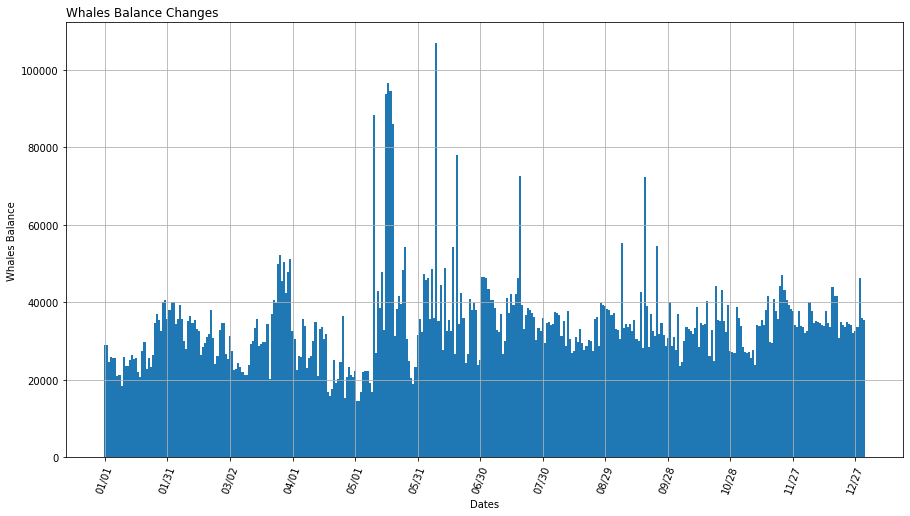

In [ ]:
#@title Track Whales Balance
import requests
import certifi
import matplotlib.pyplot as plt
import datetime  
from datetime import timedelta, date
import pandas as pd
import pytz
import statistics 

def get_internal_tx(address, startblock, endblock, balance_hashmap) -> dict():
  # account for internal transactions 
  internaltx = dict()
  url2 = "https://api.etherscan.io/api?module=account&action=txlistinternal&address=" + address + "&startblock=" + str(startblock) + "&endblock=" + str(endblock) + "&page=1&sort=desc&apikey=SKMKXN954GUHUYBF5JFKHS7I1M8IK5SXQP"
  response2 = requests.get(url2, verify=certifi.where())
  address_content2 = response2.json()
  result2 = address_content2.get('result')
  for n, transaction in enumerate(result2):
    tx_from = transaction.get('from').lower()
    tx_to = transaction.get('to').lower()
    eth_value = float(transaction.get('value'))/1000000000000000000.0
    timestamp = transaction.get('timeStamp')
    tx_date = datetime.datetime.fromtimestamp(int(timestamp), tz=pytz.utc).date().strftime("%Y/%m/%d")
    if tx_from == address.lower():
      if tx_date not in internaltx.keys():
        internaltx[tx_date] = eth_value # sending ether out 
      else:
        internaltx[tx_date] += eth_value
    if tx_to == address.lower():
      if tx_date not in internaltx.keys():
        internaltx[tx_date] = -1*eth_value # receiving ether
      else:
        internaltx[tx_date] -= eth_value
  print(internaltx)
  return internaltx

def update_historical_balance(address, startblock, endblock, last_timestamp, change_in_balance, balance_hashmap):
  internaltx = get_internal_tx(address, startblock, endblock, balance_hashmap)
  url = "https://api.etherscan.io/api?module=account&action=txlist&address=" + address + "&startblock=" + str(startblock) + "&endblock=" + str(endblock) + "&page=1&sort=desc&apikey=SKMKXN954GUHUYBF5JFKHS7I1M8IK5SXQP"
  response = requests.get(url, verify=certifi.where())
  address_content = response.json()
  result = address_content.get('result')

  # find recent date of the end block
  recent_date = datetime.datetime.fromtimestamp(int(last_timestamp), tz=pytz.utc).date()

  new_endblock = 0
  last_timestamp = 0
  # Etherscan API returns txs from most recent to oldest transactions, so we start from the initial balance and work backward
  for n, transaction in enumerate(result):
    tx_from = transaction.get('from').lower()
    tx_to = transaction.get('to').lower()
    eth_value = float(transaction.get('value'))/1000000000000000000.0
    hash = transaction.get('hash')
    timestamp = transaction.get('timeStamp')
    # skipping transactions that are made in the same block but later than the end transaction
    # if timestamp >= last_timestamp:
    #   continue
    tx_date = datetime.datetime.fromtimestamp(int(timestamp), tz=pytz.utc).date()

    # print("change in balance", change_in_balance, "before tx hash", hash)
    if eth_value == 0 and tx_date.strftime("%Y/%m/%d") in internaltx.keys():
      print("this tx may be internal:", hash)
      eth_value += internaltx[tx_date.strftime("%Y/%m/%d")]
      del internaltx[tx_date.strftime("%Y/%m/%d")]
    # if detected a change in tx date, modify hashmap balance for all dates between the last transaction and this transaction
    while recent_date > tx_date:
      # print("tx date is", tx_date, "recent date is", recent_date, "change of balance is:", change_in_balance)
      recent_date = recent_date - timedelta(days=1) # recent date updated to the tx date in the last iteration an
      balance_hashmap[recent_date.strftime("%Y/%m/%d")] += change_in_balance
    # if sent the tx, add the value and the gas fees back
    if tx_from == address.lower():
      gas_fee = float(transaction.get('gasPrice'))//1000000000000000000.0
      change_in_balance += eth_value + gas_fee
      # print("value", eth_value, "hash", transaction.get('hash'), "changed balance", change_in_balance)
    # if received the tx, substract the value
    if tx_to == address.lower():
      change_in_balance -= eth_value     
    if n == 9999:
      new_endblock = transaction.get('blockNumber')
      last_timestamp = timestamp
      # next_timestamp = timestamp
  print("post internal tx", internaltx)
  return(n, new_endblock, last_timestamp, change_in_balance)

start_date = date(2022, 1, 1)
end_date = date(2022, 12, 31)
startblock = convert_date_to_blockNumber(start_date)
endblock = convert_date_to_blockNumber(end_date + timedelta(days=1)) # starts from the first block in 2022 and ends in the first block in 2023

balance_hashmap = dict() # hashmap records total balance of all whales
daterange = pd.date_range(start_date, end_date)
for single_date in daterange:
  balance_hashmap[single_date.strftime("%Y/%m/%d")] = 0 # mapping from date to total balance oF all whales
print(balance_hashmap)

selected_addresses = ['0xB8001C3eC9AA1985f6c747E25c28324E4A361ec1', '0xD7efCbB86eFdD9E8dE014dafA5944AaE36E817e4', '0x6081258689a75d253d87cE902A8de3887239Fe80', '0xCD531Ae9EFCCE479654c4926dec5F6209531Ca7b', '0x4f6742bADB049791CD9A37ea913f2BAC38d01279']
for address in selected_addresses:
  initial_balance = float(w3.fromWei(w3.eth.get_balance(address, block_identifier=endblock), 'ether'))
  # add initial balance of the address to all dates of the year and later only track changes
  for single_date in daterange:
    balance_hashmap[single_date.strftime("%Y/%m/%d")] += initial_balance
  
  change_in_balance = 0
  last_timestamp = w3.eth.get_block(endblock)['timestamp']
  record_executed, new_endblock, last_timestamp, change_in_balance = update_historical_balance(address, startblock, endblock, last_timestamp, change_in_balance, balance_hashmap) 
  while record_executed == 9999:
    print("new end block is", new_endblock)
    record_executed, new_endblock, last_timestamp, change_in_balance = update_historical_balance(address, start_block, new_endblock, last_timestamp, change_in_balance, balance_hashmap) 

print(balance_hashmap)

dates = balance_hashmap.keys()
historical_balance = balance_hashmap.values()

median = statistics.median(historical_balance)
mean = statistics.mean(historical_balance)
print('median of the whales account balance is', median)
print('mean of the whales account balance is', mean)

# visualize balance changes of whales
dates = [e[5:] for e in dates]
plt.figure(figsize=(15, 8))
plt.bar(range(len(balance_hashmap)), historical_balance, width=1.0)
plt.xticks(rotation=70)
plt.xticks(range(0, len(dates), 30))
plt.xticks(range(0, len(dates), 30), dates[0::30])
plt.grid(True)

plt.xlabel('Dates')
plt.ylabel('Whales Balance')
plt.title('Whales Balance Changes', loc='left')
plt.show()


In [ ]:
#@title Track Whale Stablecoin Token Holding
weth_address = w3.toChecksumAddress('0xC02aaA39b223FE8D0A0e5C4F27eAD9083C756Cc2')
weth_abi = json.loads('[{"constant":true,"inputs":[],"name":"name","outputs":[{"name":"","type":"string"}],"payable":false,"stateMutability":"view","type":"function"},{"constant":false,"inputs":[{"name":"guy","type":"address"},{"name":"wad","type":"uint256"}],"name":"approve","outputs":[{"name":"","type":"bool"}],"payable":false,"stateMutability":"nonpayable","type":"function"},{"constant":true,"inputs":[],"name":"totalSupply","outputs":[{"name":"","type":"uint256"}],"payable":false,"stateMutability":"view","type":"function"},{"constant":false,"inputs":[{"name":"src","type":"address"},{"name":"dst","type":"address"},{"name":"wad","type":"uint256"}],"name":"transferFrom","outputs":[{"name":"","type":"bool"}],"payable":false,"stateMutability":"nonpayable","type":"function"},{"constant":false,"inputs":[{"name":"wad","type":"uint256"}],"name":"withdraw","outputs":[],"payable":false,"stateMutability":"nonpayable","type":"function"},{"constant":true,"inputs":[],"name":"decimals","outputs":[{"name":"","type":"uint8"}],"payable":false,"stateMutability":"view","type":"function"},{"constant":true,"inputs":[{"name":"","type":"address"}],"name":"balanceOf","outputs":[{"name":"","type":"uint256"}],"payable":false,"stateMutability":"view","type":"function"},{"constant":true,"inputs":[],"name":"symbol","outputs":[{"name":"","type":"string"}],"payable":false,"stateMutability":"view","type":"function"},{"constant":false,"inputs":[{"name":"dst","type":"address"},{"name":"wad","type":"uint256"}],"name":"transfer","outputs":[{"name":"","type":"bool"}],"payable":false,"stateMutability":"nonpayable","type":"function"},{"constant":false,"inputs":[],"name":"deposit","outputs":[],"payable":true,"stateMutability":"payable","type":"function"},{"constant":true,"inputs":[{"name":"","type":"address"},{"name":"","type":"address"}],"name":"allowance","outputs":[{"name":"","type":"uint256"}],"payable":false,"stateMutability":"view","type":"function"},{"payable":true,"stateMutability":"payable","type":"fallback"},{"anonymous":false,"inputs":[{"indexed":true,"name":"src","type":"address"},{"indexed":true,"name":"guy","type":"address"},{"indexed":false,"name":"wad","type":"uint256"}],"name":"Approval","type":"event"},{"anonymous":false,"inputs":[{"indexed":true,"name":"src","type":"address"},{"indexed":true,"name":"dst","type":"address"},{"indexed":false,"name":"wad","type":"uint256"}],"name":"Transfer","type":"event"},{"anonymous":false,"inputs":[{"indexed":true,"name":"dst","type":"address"},{"indexed":false,"name":"wad","type":"uint256"}],"name":"Deposit","type":"event"},{"anonymous":false,"inputs":[{"indexed":true,"name":"src","type":"address"},{"indexed":false,"name":"wad","type":"uint256"}],"name":"Withdrawal","type":"event"}]')
weth_contract = w3.eth.contract(address=weth_address, abi=weth_abi)

w3.fromWei(weth_contract.functions.balanceOf('0xaBCA5d24CFB84dE8888F744fcbbFA7c1A667DCc8').call(),'ether')

w3.fromWei(w3.eth.get_balance('0xaBCA5d24CFB84dE8888F744fcbbFA7c1A667DCc8'), 'ether')

Decimal('0.113279034792029806')

In [ ]:
# list of stablecoin contracts, ordered by market cap

usdt_address = w3.toChecksumAddress('0xdAC17F958D2ee523a2206206994597C13D831ec7')
usdt_abi = json.loads('[{"constant":true,"inputs":[],"name":"name","outputs":[{"name":"","type":"string"}],"payable":false,"stateMutability":"view","type":"function"},{"constant":false,"inputs":[{"name":"_upgradedAddress","type":"address"}],"name":"deprecate","outputs":[],"payable":false,"stateMutability":"nonpayable","type":"function"},{"constant":false,"inputs":[{"name":"_spender","type":"address"},{"name":"_value","type":"uint256"}],"name":"approve","outputs":[],"payable":false,"stateMutability":"nonpayable","type":"function"},{"constant":true,"inputs":[],"name":"deprecated","outputs":[{"name":"","type":"bool"}],"payable":false,"stateMutability":"view","type":"function"},{"constant":false,"inputs":[{"name":"_evilUser","type":"address"}],"name":"addBlackList","outputs":[],"payable":false,"stateMutability":"nonpayable","type":"function"},{"constant":true,"inputs":[],"name":"totalSupply","outputs":[{"name":"","type":"uint256"}],"payable":false,"stateMutability":"view","type":"function"},{"constant":false,"inputs":[{"name":"_from","type":"address"},{"name":"_to","type":"address"},{"name":"_value","type":"uint256"}],"name":"transferFrom","outputs":[],"payable":false,"stateMutability":"nonpayable","type":"function"},{"constant":true,"inputs":[],"name":"upgradedAddress","outputs":[{"name":"","type":"address"}],"payable":false,"stateMutability":"view","type":"function"},{"constant":true,"inputs":[{"name":"","type":"address"}],"name":"balances","outputs":[{"name":"","type":"uint256"}],"payable":false,"stateMutability":"view","type":"function"},{"constant":true,"inputs":[],"name":"decimals","outputs":[{"name":"","type":"uint256"}],"payable":false,"stateMutability":"view","type":"function"},{"constant":true,"inputs":[],"name":"maximumFee","outputs":[{"name":"","type":"uint256"}],"payable":false,"stateMutability":"view","type":"function"},{"constant":true,"inputs":[],"name":"_totalSupply","outputs":[{"name":"","type":"uint256"}],"payable":false,"stateMutability":"view","type":"function"},{"constant":false,"inputs":[],"name":"unpause","outputs":[],"payable":false,"stateMutability":"nonpayable","type":"function"},{"constant":true,"inputs":[{"name":"_maker","type":"address"}],"name":"getBlackListStatus","outputs":[{"name":"","type":"bool"}],"payable":false,"stateMutability":"view","type":"function"},{"constant":true,"inputs":[{"name":"","type":"address"},{"name":"","type":"address"}],"name":"allowed","outputs":[{"name":"","type":"uint256"}],"payable":false,"stateMutability":"view","type":"function"},{"constant":true,"inputs":[],"name":"paused","outputs":[{"name":"","type":"bool"}],"payable":false,"stateMutability":"view","type":"function"},{"constant":true,"inputs":[{"name":"who","type":"address"}],"name":"balanceOf","outputs":[{"name":"","type":"uint256"}],"payable":false,"stateMutability":"view","type":"function"},{"constant":false,"inputs":[],"name":"pause","outputs":[],"payable":false,"stateMutability":"nonpayable","type":"function"},{"constant":true,"inputs":[],"name":"getOwner","outputs":[{"name":"","type":"address"}],"payable":false,"stateMutability":"view","type":"function"},{"constant":true,"inputs":[],"name":"owner","outputs":[{"name":"","type":"address"}],"payable":false,"stateMutability":"view","type":"function"},{"constant":true,"inputs":[],"name":"symbol","outputs":[{"name":"","type":"string"}],"payable":false,"stateMutability":"view","type":"function"},{"constant":false,"inputs":[{"name":"_to","type":"address"},{"name":"_value","type":"uint256"}],"name":"transfer","outputs":[],"payable":false,"stateMutability":"nonpayable","type":"function"},{"constant":false,"inputs":[{"name":"newBasisPoints","type":"uint256"},{"name":"newMaxFee","type":"uint256"}],"name":"setParams","outputs":[],"payable":false,"stateMutability":"nonpayable","type":"function"},{"constant":false,"inputs":[{"name":"amount","type":"uint256"}],"name":"issue","outputs":[],"payable":false,"stateMutability":"nonpayable","type":"function"},{"constant":false,"inputs":[{"name":"amount","type":"uint256"}],"name":"redeem","outputs":[],"payable":false,"stateMutability":"nonpayable","type":"function"},{"constant":true,"inputs":[{"name":"_owner","type":"address"},{"name":"_spender","type":"address"}],"name":"allowance","outputs":[{"name":"remaining","type":"uint256"}],"payable":false,"stateMutability":"view","type":"function"},{"constant":true,"inputs":[],"name":"basisPointsRate","outputs":[{"name":"","type":"uint256"}],"payable":false,"stateMutability":"view","type":"function"},{"constant":true,"inputs":[{"name":"","type":"address"}],"name":"isBlackListed","outputs":[{"name":"","type":"bool"}],"payable":false,"stateMutability":"view","type":"function"},{"constant":false,"inputs":[{"name":"_clearedUser","type":"address"}],"name":"removeBlackList","outputs":[],"payable":false,"stateMutability":"nonpayable","type":"function"},{"constant":true,"inputs":[],"name":"MAX_UINT","outputs":[{"name":"","type":"uint256"}],"payable":false,"stateMutability":"view","type":"function"},{"constant":false,"inputs":[{"name":"newOwner","type":"address"}],"name":"transferOwnership","outputs":[],"payable":false,"stateMutability":"nonpayable","type":"function"},{"constant":false,"inputs":[{"name":"_blackListedUser","type":"address"}],"name":"destroyBlackFunds","outputs":[],"payable":false,"stateMutability":"nonpayable","type":"function"},{"inputs":[{"name":"_initialSupply","type":"uint256"},{"name":"_name","type":"string"},{"name":"_symbol","type":"string"},{"name":"_decimals","type":"uint256"}],"payable":false,"stateMutability":"nonpayable","type":"constructor"},{"anonymous":false,"inputs":[{"indexed":false,"name":"amount","type":"uint256"}],"name":"Issue","type":"event"},{"anonymous":false,"inputs":[{"indexed":false,"name":"amount","type":"uint256"}],"name":"Redeem","type":"event"},{"anonymous":false,"inputs":[{"indexed":false,"name":"newAddress","type":"address"}],"name":"Deprecate","type":"event"},{"anonymous":false,"inputs":[{"indexed":false,"name":"feeBasisPoints","type":"uint256"},{"indexed":false,"name":"maxFee","type":"uint256"}],"name":"Params","type":"event"},{"anonymous":false,"inputs":[{"indexed":false,"name":"_blackListedUser","type":"address"},{"indexed":false,"name":"_balance","type":"uint256"}],"name":"DestroyedBlackFunds","type":"event"},{"anonymous":false,"inputs":[{"indexed":false,"name":"_user","type":"address"}],"name":"AddedBlackList","type":"event"},{"anonymous":false,"inputs":[{"indexed":false,"name":"_user","type":"address"}],"name":"RemovedBlackList","type":"event"},{"anonymous":false,"inputs":[{"indexed":true,"name":"owner","type":"address"},{"indexed":true,"name":"spender","type":"address"},{"indexed":false,"name":"value","type":"uint256"}],"name":"Approval","type":"event"},{"anonymous":false,"inputs":[{"indexed":true,"name":"from","type":"address"},{"indexed":true,"name":"to","type":"address"},{"indexed":false,"name":"value","type":"uint256"}],"name":"Transfer","type":"event"},{"anonymous":false,"inputs":[],"name":"Pause","type":"event"},{"anonymous":false,"inputs":[],"name":"Unpause","type":"event"}]')
usdt_contract = w3.eth.contract(address=usdt_address, abi=usdt_abi)

usdc_address = w3.toChecksumAddress('0x7EA2be2df7BA6E54B1A9C70676f668455E329d29')
usdc_abi = json.loads('[{"inputs":[{"internalType":"string","name":"_name","type":"string"},{"internalType":"string","name":"_symbol","type":"string"},{"internalType":"uint8","name":"_decimals","type":"uint8"},{"internalType":"address","name":"_underlying","type":"address"},{"internalType":"address","name":"_vault","type":"address"}],"stateMutability":"nonpayable","type":"constructor"},{"anonymous":false,"inputs":[{"indexed":true,"internalType":"address","name":"owner","type":"address"},{"indexed":true,"internalType":"address","name":"spender","type":"address"},{"indexed":false,"internalType":"uint256","name":"value","type":"uint256"}],"name":"Approval","type":"event"},{"anonymous":false,"inputs":[{"indexed":true,"internalType":"address","name":"auth","type":"address"},{"indexed":false,"internalType":"uint256","name":"timestamp","type":"uint256"}],"name":"LogAddAuth","type":"event"},{"anonymous":false,"inputs":[{"indexed":true,"internalType":"address","name":"oldOwner","type":"address"},{"indexed":true,"internalType":"address","name":"newOwner","type":"address"},{"indexed":true,"internalType":"uint256","name":"effectiveHeight","type":"uint256"}],"name":"LogChangeMPCOwner","type":"event"},{"anonymous":false,"inputs":[{"indexed":true,"internalType":"address","name":"oldVault","type":"address"},{"indexed":true,"internalType":"address","name":"newVault","type":"address"},{"indexed":true,"internalType":"uint256","name":"effectiveTime","type":"uint256"}],"name":"LogChangeVault","type":"event"},{"anonymous":false,"inputs":[{"indexed":true,"internalType":"bytes32","name":"txhash","type":"bytes32"},{"indexed":true,"internalType":"address","name":"account","type":"address"},{"indexed":false,"internalType":"uint256","name":"amount","type":"uint256"}],"name":"LogSwapin","type":"event"},{"anonymous":false,"inputs":[{"indexed":true,"internalType":"address","name":"account","type":"address"},{"indexed":true,"internalType":"address","name":"bindaddr","type":"address"},{"indexed":false,"internalType":"uint256","name":"amount","type":"uint256"}],"name":"LogSwapout","type":"event"},{"anonymous":false,"inputs":[{"indexed":true,"internalType":"address","name":"from","type":"address"},{"indexed":true,"internalType":"address","name":"to","type":"address"},{"indexed":false,"internalType":"uint256","name":"value","type":"uint256"}],"name":"Transfer","type":"event"},{"inputs":[],"name":"DOMAIN_SEPARATOR","outputs":[{"internalType":"bytes32","name":"","type":"bytes32"}],"stateMutability":"view","type":"function"},{"inputs":[],"name":"PERMIT_TYPEHASH","outputs":[{"internalType":"bytes32","name":"","type":"bytes32"}],"stateMutability":"view","type":"function"},{"inputs":[{"internalType":"bytes32","name":"txhash","type":"bytes32"},{"internalType":"address","name":"account","type":"address"},{"internalType":"uint256","name":"amount","type":"uint256"}],"name":"Swapin","outputs":[{"internalType":"bool","name":"","type":"bool"}],"stateMutability":"nonpayable","type":"function"},{"inputs":[{"internalType":"uint256","name":"amount","type":"uint256"},{"internalType":"address","name":"bindaddr","type":"address"}],"name":"Swapout","outputs":[{"internalType":"bool","name":"","type":"bool"}],"stateMutability":"nonpayable","type":"function"},{"inputs":[],"name":"TRANSFER_TYPEHASH","outputs":[{"internalType":"bytes32","name":"","type":"bytes32"}],"stateMutability":"view","type":"function"},{"inputs":[{"internalType":"address","name":"","type":"address"},{"internalType":"address","name":"","type":"address"}],"name":"allowance","outputs":[{"internalType":"uint256","name":"","type":"uint256"}],"stateMutability":"view","type":"function"},{"inputs":[],"name":"applyMinter","outputs":[],"stateMutability":"nonpayable","type":"function"},{"inputs":[],"name":"applyVault","outputs":[],"stateMutability":"nonpayable","type":"function"},{"inputs":[{"internalType":"address","name":"spender","type":"address"},{"internalType":"uint256","name":"value","type":"uint256"}],"name":"approve","outputs":[{"internalType":"bool","name":"","type":"bool"}],"stateMutability":"nonpayable","type":"function"},{"inputs":[{"internalType":"address","name":"spender","type":"address"},{"internalType":"uint256","name":"value","type":"uint256"},{"internalType":"bytes","name":"data","type":"bytes"}],"name":"approveAndCall","outputs":[{"internalType":"bool","name":"","type":"bool"}],"stateMutability":"nonpayable","type":"function"},{"inputs":[{"internalType":"address","name":"","type":"address"}],"name":"balanceOf","outputs":[{"internalType":"uint256","name":"","type":"uint256"}],"stateMutability":"view","type":"function"},{"inputs":[{"internalType":"address","name":"from","type":"address"},{"internalType":"uint256","name":"amount","type":"uint256"}],"name":"burn","outputs":[{"internalType":"bool","name":"","type":"bool"}],"stateMutability":"nonpayable","type":"function"},{"inputs":[{"internalType":"address","name":"newVault","type":"address"}],"name":"changeMPCOwner","outputs":[{"internalType":"bool","name":"","type":"bool"}],"stateMutability":"nonpayable","type":"function"},{"inputs":[{"internalType":"address","name":"newVault","type":"address"}],"name":"changeVault","outputs":[{"internalType":"bool","name":"","type":"bool"}],"stateMutability":"nonpayable","type":"function"},{"inputs":[],"name":"decimals","outputs":[{"internalType":"uint8","name":"","type":"uint8"}],"stateMutability":"view","type":"function"},{"inputs":[],"name":"delay","outputs":[{"internalType":"uint256","name":"","type":"uint256"}],"stateMutability":"view","type":"function"},{"inputs":[],"name":"delayDelay","outputs":[{"internalType":"uint256","name":"","type":"uint256"}],"stateMutability":"view","type":"function"},{"inputs":[],"name":"delayMinter","outputs":[{"internalType":"uint256","name":"","type":"uint256"}],"stateMutability":"view","type":"function"},{"inputs":[],"name":"delayVault","outputs":[{"internalType":"uint256","name":"","type":"uint256"}],"stateMutability":"view","type":"function"},{"inputs":[{"internalType":"uint256","name":"amount","type":"uint256"},{"internalType":"address","name":"to","type":"address"}],"name":"deposit","outputs":[{"internalType":"uint256","name":"","type":"uint256"}],"stateMutability":"nonpayable","type":"function"},{"inputs":[{"internalType":"uint256","name":"amount","type":"uint256"}],"name":"deposit","outputs":[{"internalType":"uint256","name":"","type":"uint256"}],"stateMutability":"nonpayable","type":"function"},{"inputs":[],"name":"deposit","outputs":[{"internalType":"uint256","name":"","type":"uint256"}],"stateMutability":"nonpayable","type":"function"},{"inputs":[{"internalType":"uint256","name":"amount","type":"uint256"},{"internalType":"address","name":"to","type":"address"}],"name":"depositVault","outputs":[{"internalType":"uint256","name":"","type":"uint256"}],"stateMutability":"nonpayable","type":"function"},{"inputs":[{"internalType":"address","name":"target","type":"address"},{"internalType":"uint256","name":"value","type":"uint256"},{"internalType":"uint256","name":"deadline","type":"uint256"},{"internalType":"uint8","name":"v","type":"uint8"},{"internalType":"bytes32","name":"r","type":"bytes32"},{"internalType":"bytes32","name":"s","type":"bytes32"},{"internalType":"address","name":"to","type":"address"}],"name":"depositWithPermit","outputs":[{"internalType":"uint256","name":"","type":"uint256"}],"stateMutability":"nonpayable","type":"function"},{"inputs":[{"internalType":"address","name":"target","type":"address"},{"internalType":"uint256","name":"value","type":"uint256"},{"internalType":"uint256","name":"deadline","type":"uint256"},{"internalType":"uint8","name":"v","type":"uint8"},{"internalType":"bytes32","name":"r","type":"bytes32"},{"internalType":"bytes32","name":"s","type":"bytes32"},{"internalType":"address","name":"to","type":"address"}],"name":"depositWithTransferPermit","outputs":[{"internalType":"uint256","name":"","type":"uint256"}],"stateMutability":"nonpayable","type":"function"},{"inputs":[],"name":"getAllMinters","outputs":[{"internalType":"address[]","name":"","type":"address[]"}],"stateMutability":"view","type":"function"},{"inputs":[{"internalType":"address","name":"_vault","type":"address"}],"name":"initVault","outputs":[],"stateMutability":"nonpayable","type":"function"},{"inputs":[{"internalType":"address","name":"","type":"address"}],"name":"isMinter","outputs":[{"internalType":"bool","name":"","type":"bool"}],"stateMutability":"view","type":"function"},{"inputs":[{"internalType":"address","name":"to","type":"address"},{"internalType":"uint256","name":"amount","type":"uint256"}],"name":"mint","outputs":[{"internalType":"bool","name":"","type":"bool"}],"stateMutability":"nonpayable","type":"function"},{"inputs":[{"internalType":"uint256","name":"","type":"uint256"}],"name":"minters","outputs":[{"internalType":"address","name":"","type":"address"}],"stateMutability":"view","type":"function"},{"inputs":[],"name":"mpc","outputs":[{"internalType":"address","name":"","type":"address"}],"stateMutability":"view","type":"function"},{"inputs":[],"name":"name","outputs":[{"internalType":"string","name":"","type":"string"}],"stateMutability":"view","type":"function"},{"inputs":[{"internalType":"address","name":"","type":"address"}],"name":"nonces","outputs":[{"internalType":"uint256","name":"","type":"uint256"}],"stateMutability":"view","type":"function"},{"inputs":[],"name":"owner","outputs":[{"internalType":"address","name":"","type":"address"}],"stateMutability":"view","type":"function"},{"inputs":[],"name":"pendingDelay","outputs":[{"internalType":"uint256","name":"","type":"uint256"}],"stateMutability":"view","type":"function"},{"inputs":[],"name":"pendingMinter","outputs":[{"internalType":"address","name":"","type":"address"}],"stateMutability":"view","type":"function"},{"inputs":[],"name":"pendingVault","outputs":[{"internalType":"address","name":"","type":"address"}],"stateMutability":"view","type":"function"},{"inputs":[{"internalType":"address","name":"target","type":"address"},{"internalType":"address","name":"spender","type":"address"},{"internalType":"uint256","name":"value","type":"uint256"},{"internalType":"uint256","name":"deadline","type":"uint256"},{"internalType":"uint8","name":"v","type":"uint8"},{"internalType":"bytes32","name":"r","type":"bytes32"},{"internalType":"bytes32","name":"s","type":"bytes32"}],"name":"permit","outputs":[],"stateMutability":"nonpayable","type":"function"},{"inputs":[{"internalType":"address","name":"_auth","type":"address"}],"name":"revokeMinter","outputs":[],"stateMutability":"nonpayable","type":"function"},{"inputs":[{"internalType":"address","name":"_auth","type":"address"}],"name":"setMinter","outputs":[],"stateMutability":"nonpayable","type":"function"},{"inputs":[{"internalType":"address","name":"_vault","type":"address"}],"name":"setVault","outputs":[],"stateMutability":"nonpayable","type":"function"},{"inputs":[{"internalType":"bool","name":"enabled","type":"bool"}],"name":"setVaultOnly","outputs":[],"stateMutability":"nonpayable","type":"function"},{"inputs":[],"name":"symbol","outputs":[{"internalType":"string","name":"","type":"string"}],"stateMutability":"view","type":"function"},{"inputs":[],"name":"totalSupply","outputs":[{"internalType":"uint256","name":"","type":"uint256"}],"stateMutability":"view","type":"function"},{"inputs":[{"internalType":"address","name":"to","type":"address"},{"internalType":"uint256","name":"value","type":"uint256"}],"name":"transfer","outputs":[{"internalType":"bool","name":"","type":"bool"}],"stateMutability":"nonpayable","type":"function"},{"inputs":[{"internalType":"address","name":"to","type":"address"},{"internalType":"uint256","name":"value","type":"uint256"},{"internalType":"bytes","name":"data","type":"bytes"}],"name":"transferAndCall","outputs":[{"internalType":"bool","name":"","type":"bool"}],"stateMutability":"nonpayable","type":"function"},{"inputs":[{"internalType":"address","name":"from","type":"address"},{"internalType":"address","name":"to","type":"address"},{"internalType":"uint256","name":"value","type":"uint256"}],"name":"transferFrom","outputs":[{"internalType":"bool","name":"","type":"bool"}],"stateMutability":"nonpayable","type":"function"},{"inputs":[{"internalType":"address","name":"target","type":"address"},{"internalType":"address","name":"to","type":"address"},{"internalType":"uint256","name":"value","type":"uint256"},{"internalType":"uint256","name":"deadline","type":"uint256"},{"internalType":"uint8","name":"v","type":"uint8"},{"internalType":"bytes32","name":"r","type":"bytes32"},{"internalType":"bytes32","name":"s","type":"bytes32"}],"name":"transferWithPermit","outputs":[{"internalType":"bool","name":"","type":"bool"}],"stateMutability":"nonpayable","type":"function"},{"inputs":[],"name":"underlying","outputs":[{"internalType":"address","name":"","type":"address"}],"stateMutability":"view","type":"function"},{"inputs":[],"name":"vault","outputs":[{"internalType":"address","name":"","type":"address"}],"stateMutability":"view","type":"function"},{"inputs":[{"internalType":"uint256","name":"amount","type":"uint256"},{"internalType":"address","name":"to","type":"address"}],"name":"withdraw","outputs":[{"internalType":"uint256","name":"","type":"uint256"}],"stateMutability":"nonpayable","type":"function"},{"inputs":[{"internalType":"uint256","name":"amount","type":"uint256"}],"name":"withdraw","outputs":[{"internalType":"uint256","name":"","type":"uint256"}],"stateMutability":"nonpayable","type":"function"},{"inputs":[],"name":"withdraw","outputs":[{"internalType":"uint256","name":"","type":"uint256"}],"stateMutability":"nonpayable","type":"function"},{"inputs":[{"internalType":"address","name":"from","type":"address"},{"internalType":"uint256","name":"amount","type":"uint256"},{"internalType":"address","name":"to","type":"address"}],"name":"withdrawVault","outputs":[{"internalType":"uint256","name":"","type":"uint256"}],"stateMutability":"nonpayable","type":"function"}]')
usdc_contract = w3.eth.contract(address=usdc_address, abi=usdc_abi)

# busd_address = w3.toChecksumAddress('0x4Fabb145d64652a948d72533023f6E7A623C7C53')
# busd_abi = json.loads('[{"constant":false,"inputs":[{"name":"newImplementation","type":"address"}],"name":"upgradeTo","outputs":[],"payable":false,"stateMutability":"nonpayable","type":"function"},{"constant":false,"inputs":[{"name":"newImplementation","type":"address"},{"name":"data","type":"bytes"}],"name":"upgradeToAndCall","outputs":[],"payable":true,"stateMutability":"payable","type":"function"},{"constant":true,"inputs":[],"name":"implementation","outputs":[{"name":"","type":"address"}],"payable":false,"stateMutability":"view","type":"function"},{"constant":false,"inputs":[{"name":"newAdmin","type":"address"}],"name":"changeAdmin","outputs":[],"payable":false,"stateMutability":"nonpayable","type":"function"},{"constant":true,"inputs":[],"name":"admin","outputs":[{"name":"","type":"address"}],"payable":false,"stateMutability":"view","type":"function"},{"inputs":[{"name":"_implementation","type":"address"}],"payable":false,"stateMutability":"nonpayable","type":"constructor"},{"payable":true,"stateMutability":"payable","type":"fallback"},{"anonymous":false,"inputs":[{"indexed":false,"name":"previousAdmin","type":"address"},{"indexed":false,"name":"newAdmin","type":"address"}],"name":"AdminChanged","type":"event"},{"anonymous":false,"inputs":[{"indexed":false,"name":"implementation","type":"address"}],"name":"Upgraded","type":"event"}]')
# busd_contract = w3.eth.contract(address=busd_address, abi=busd_abi)

dai_address = w3.toChecksumAddress('0x6B175474E89094C44Da98b954EedeAC495271d0F')
dai_abi = json.loads('[{"inputs":[{"internalType":"uint256","name":"chainId_","type":"uint256"}],"payable":false,"stateMutability":"nonpayable","type":"constructor"},{"anonymous":false,"inputs":[{"indexed":true,"internalType":"address","name":"src","type":"address"},{"indexed":true,"internalType":"address","name":"guy","type":"address"},{"indexed":false,"internalType":"uint256","name":"wad","type":"uint256"}],"name":"Approval","type":"event"},{"anonymous":true,"inputs":[{"indexed":true,"internalType":"bytes4","name":"sig","type":"bytes4"},{"indexed":true,"internalType":"address","name":"usr","type":"address"},{"indexed":true,"internalType":"bytes32","name":"arg1","type":"bytes32"},{"indexed":true,"internalType":"bytes32","name":"arg2","type":"bytes32"},{"indexed":false,"internalType":"bytes","name":"data","type":"bytes"}],"name":"LogNote","type":"event"},{"anonymous":false,"inputs":[{"indexed":true,"internalType":"address","name":"src","type":"address"},{"indexed":true,"internalType":"address","name":"dst","type":"address"},{"indexed":false,"internalType":"uint256","name":"wad","type":"uint256"}],"name":"Transfer","type":"event"},{"constant":true,"inputs":[],"name":"DOMAIN_SEPARATOR","outputs":[{"internalType":"bytes32","name":"","type":"bytes32"}],"payable":false,"stateMutability":"view","type":"function"},{"constant":true,"inputs":[],"name":"PERMIT_TYPEHASH","outputs":[{"internalType":"bytes32","name":"","type":"bytes32"}],"payable":false,"stateMutability":"view","type":"function"},{"constant":true,"inputs":[{"internalType":"address","name":"","type":"address"},{"internalType":"address","name":"","type":"address"}],"name":"allowance","outputs":[{"internalType":"uint256","name":"","type":"uint256"}],"payable":false,"stateMutability":"view","type":"function"},{"constant":false,"inputs":[{"internalType":"address","name":"usr","type":"address"},{"internalType":"uint256","name":"wad","type":"uint256"}],"name":"approve","outputs":[{"internalType":"bool","name":"","type":"bool"}],"payable":false,"stateMutability":"nonpayable","type":"function"},{"constant":true,"inputs":[{"internalType":"address","name":"","type":"address"}],"name":"balanceOf","outputs":[{"internalType":"uint256","name":"","type":"uint256"}],"payable":false,"stateMutability":"view","type":"function"},{"constant":false,"inputs":[{"internalType":"address","name":"usr","type":"address"},{"internalType":"uint256","name":"wad","type":"uint256"}],"name":"burn","outputs":[],"payable":false,"stateMutability":"nonpayable","type":"function"},{"constant":true,"inputs":[],"name":"decimals","outputs":[{"internalType":"uint8","name":"","type":"uint8"}],"payable":false,"stateMutability":"view","type":"function"},{"constant":false,"inputs":[{"internalType":"address","name":"guy","type":"address"}],"name":"deny","outputs":[],"payable":false,"stateMutability":"nonpayable","type":"function"},{"constant":false,"inputs":[{"internalType":"address","name":"usr","type":"address"},{"internalType":"uint256","name":"wad","type":"uint256"}],"name":"mint","outputs":[],"payable":false,"stateMutability":"nonpayable","type":"function"},{"constant":false,"inputs":[{"internalType":"address","name":"src","type":"address"},{"internalType":"address","name":"dst","type":"address"},{"internalType":"uint256","name":"wad","type":"uint256"}],"name":"move","outputs":[],"payable":false,"stateMutability":"nonpayable","type":"function"},{"constant":true,"inputs":[],"name":"name","outputs":[{"internalType":"string","name":"","type":"string"}],"payable":false,"stateMutability":"view","type":"function"},{"constant":true,"inputs":[{"internalType":"address","name":"","type":"address"}],"name":"nonces","outputs":[{"internalType":"uint256","name":"","type":"uint256"}],"payable":false,"stateMutability":"view","type":"function"},{"constant":false,"inputs":[{"internalType":"address","name":"holder","type":"address"},{"internalType":"address","name":"spender","type":"address"},{"internalType":"uint256","name":"nonce","type":"uint256"},{"internalType":"uint256","name":"expiry","type":"uint256"},{"internalType":"bool","name":"allowed","type":"bool"},{"internalType":"uint8","name":"v","type":"uint8"},{"internalType":"bytes32","name":"r","type":"bytes32"},{"internalType":"bytes32","name":"s","type":"bytes32"}],"name":"permit","outputs":[],"payable":false,"stateMutability":"nonpayable","type":"function"},{"constant":false,"inputs":[{"internalType":"address","name":"usr","type":"address"},{"internalType":"uint256","name":"wad","type":"uint256"}],"name":"pull","outputs":[],"payable":false,"stateMutability":"nonpayable","type":"function"},{"constant":false,"inputs":[{"internalType":"address","name":"usr","type":"address"},{"internalType":"uint256","name":"wad","type":"uint256"}],"name":"push","outputs":[],"payable":false,"stateMutability":"nonpayable","type":"function"},{"constant":false,"inputs":[{"internalType":"address","name":"guy","type":"address"}],"name":"rely","outputs":[],"payable":false,"stateMutability":"nonpayable","type":"function"},{"constant":true,"inputs":[],"name":"symbol","outputs":[{"internalType":"string","name":"","type":"string"}],"payable":false,"stateMutability":"view","type":"function"},{"constant":true,"inputs":[],"name":"totalSupply","outputs":[{"internalType":"uint256","name":"","type":"uint256"}],"payable":false,"stateMutability":"view","type":"function"},{"constant":false,"inputs":[{"internalType":"address","name":"dst","type":"address"},{"internalType":"uint256","name":"wad","type":"uint256"}],"name":"transfer","outputs":[{"internalType":"bool","name":"","type":"bool"}],"payable":false,"stateMutability":"nonpayable","type":"function"},{"constant":false,"inputs":[{"internalType":"address","name":"src","type":"address"},{"internalType":"address","name":"dst","type":"address"},{"internalType":"uint256","name":"wad","type":"uint256"}],"name":"transferFrom","outputs":[{"internalType":"bool","name":"","type":"bool"}],"payable":false,"stateMutability":"nonpayable","type":"function"},{"constant":true,"inputs":[],"name":"version","outputs":[{"internalType":"string","name":"","type":"string"}],"payable":false,"stateMutability":"view","type":"function"},{"constant":true,"inputs":[{"internalType":"address","name":"","type":"address"}],"name":"wards","outputs":[{"internalType":"uint256","name":"","type":"uint256"}],"payable":false,"stateMutability":"view","type":"function"}]')
dai_contract = w3.eth.contract(address=dai_address, abi=dai_abi)

stablecoin_contracts = [usdt_contract, usdc_contract, dai_contract]
print(stablecoin_contracts)



[<web3._utils.datatypes.Contract object at 0x7f79ea66c400>, <web3._utils.datatypes.Contract object at 0x7f79ea66c2e0>, <web3._utils.datatypes.Contract object at 0x7f79ea66c970>]


In [ ]:
pip install moralis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pd.date_range("20220101","20221231", freq='W')

DatetimeIndex(['2022-01-02', '2022-01-09', '2022-01-16', '2022-01-23',
               '2022-01-30', '2022-02-06', '2022-02-13', '2022-02-20',
               '2022-02-27', '2022-03-06', '2022-03-13', '2022-03-20',
               '2022-03-27', '2022-04-03', '2022-04-10', '2022-04-17',
               '2022-04-24', '2022-05-01', '2022-05-08', '2022-05-15',
               '2022-05-22', '2022-05-29', '2022-06-05', '2022-06-12',
               '2022-06-19', '2022-06-26', '2022-07-03', '2022-07-10',
               '2022-07-17', '2022-07-24', '2022-07-31', '2022-08-07',
               '2022-08-14', '2022-08-21', '2022-08-28', '2022-09-04',
               '2022-09-11', '2022-09-18', '2022-09-25', '2022-10-02',
               '2022-10-09', '2022-10-16', '2022-10-23', '2022-10-30',
               '2022-11-06', '2022-11-13', '2022-11-20', '2022-11-27',
               '2022-12-04', '2022-12-11', '2022-12-18', '2022-12-25'],
              dtype='datetime64[ns]', freq='W-SUN')

16086234
16308190
{'2022/12/01': 0, '2022/12/02': 0, '2022/12/03': 0, '2022/12/04': 0, '2022/12/05': 0, '2022/12/06': 0, '2022/12/07': 0, '2022/12/08': 0, '2022/12/09': 0, '2022/12/10': 0, '2022/12/11': 0, '2022/12/12': 0, '2022/12/13': 0, '2022/12/14': 0, '2022/12/15': 0, '2022/12/16': 0, '2022/12/17': 0, '2022/12/18': 0, '2022/12/19': 0, '2022/12/20': 0, '2022/12/21': 0, '2022/12/22': 0, '2022/12/23': 0, '2022/12/24': 0, '2022/12/25': 0, '2022/12/26': 0, '2022/12/27': 0, '2022/12/28': 0, '2022/12/29': 0, '2022/12/30': 0, '2022/12/31': 0}
['12/01', '12/02', '12/03', '12/04', '12/05', '12/06', '12/07', '12/08', '12/09', '12/10', '12/11', '12/12', '12/13', '12/14', '12/15', '12/16', '12/17', '12/18', '12/19', '12/20', '12/21', '12/22', '12/23', '12/24', '12/25', '12/26', '12/27', '12/28', '12/29', '12/30', '12/31']


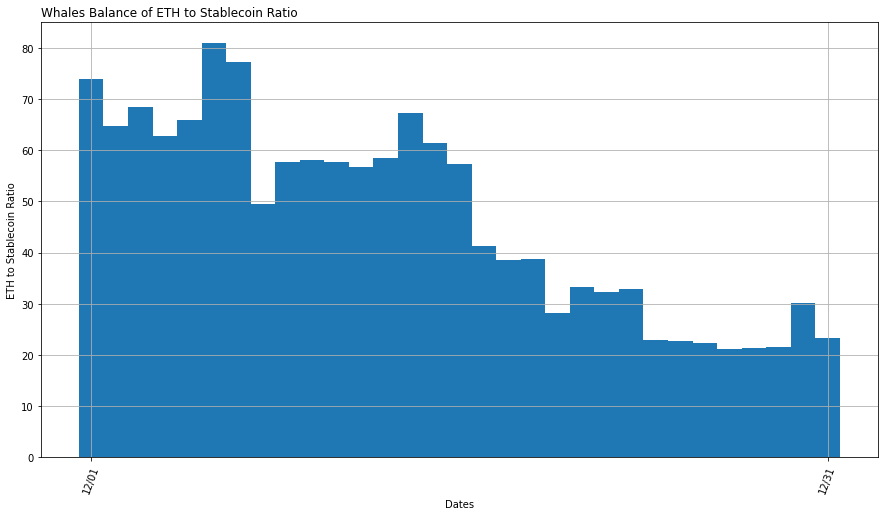

In [ ]:
#@title Track Whales Holding of ETH vs Stablecoins
import requests
import certifi
import matplotlib.pyplot as plt
import datetime  
from datetime import timedelta, date
import pandas as pd
import pytz
import statistics 
from moralis import evm_api

start_date = date(2022, 1, 1)
end_date = date(2022, 12, 31)
startblock = convert_date_to_blockNumber(start_date)
endblock = convert_date_to_blockNumber(end_date + timedelta(days=1)) # starts from the first block in 2022 and ends in the first block in 2023
# Moralis APY Key
api_key = "W3udXIDi34aiEBCF34OdaSMDUazN5yuhdmMUSHF3WoMiBGyNkJSIYWJO5lm1yFQB"

ETHPercentHolding_hashmap = dict() # hashmap records 
daterange = pd.date_range(start_date, end_date, freq='W')
for single_date in daterange:
  ETHPercentHolding_hashmap[single_date.date().strftime("%Y/%m/%d")] = 0 # mapping from date to total balance oF all whales
print(ETHPercentHolding_hashmap)

# selected_addresses = ['0xB8001C3eC9AA1985f6c747E25c28324E4A361ec1', '0xD7efCbB86eFdD9E8dE014dafA5944AaE36E817e4', '0x6081258689a75d253d87cE902A8de3887239Fe80', '0xCD531Ae9EFCCE479654c4926dec5F6209531Ca7b', '0x4f6742bADB049791CD9A37ea913f2BAC38d01279']
# add initial balance of the address to all dates of the year and later only track changes
for single_date in daterange:
  this_block = convert_date_to_blockNumber(single_date.date())
  total_eth_balance = 0
  total_stablecoin_balance = 0
  # params = {
  #   "address": "0xC02aaA39b223FE8D0A0e5C4F27eAD9083C756Cc2",
  #   "chain": "eth",
  #   "to_block": this_block
  # }
  # result = evm_api.token.get_token_price(
  #   api_key=api_key,
  #   params=params,
  # )
  # eth_price = result['usdPrice']
  for address in selected_addresses:
    total_eth_balance += float(w3.fromWei(w3.eth.get_balance(address, block_identifier=this_block), 'ether'))
    # total_eth_balance += eth_balance * eth_price
    for contract in stablecoin_contracts:
      total_stablecoin_balance += contract.functions.balanceOf(address).call(block_identifier=this_block)/1000000000000000000.0
  ETHPercentHolding_hashmap[single_date.strftime("%Y/%m/%d")] = total_eth_balance / total_stablecoin_balance

print(ETHPercentHolding_hashmap.values())
# visualize balance changes in ETH percentage holding of whales
dates = list(ETHPercentHolding_hashmap.keys())
dates = [e[5:] for e in dates]
print(dates)
plt.figure(figsize=(15, 8))
plt.bar(range(len(ETHPercentHolding_hashmap)), ETHPercentHolding_hashmap.values(), width=1.0)
plt.xticks(rotation=70)
plt.xticks(range(0, len(dates), 30))
plt.xticks(range(0, len(dates), 30), dates[0::30])
plt.grid(True)

plt.xlabel('Dates')
plt.ylabel('ETH to Stablecoin Ratio')
plt.title('Whales Balance of ETH to Stablecoin Ratio', loc='left')
plt.show()


In [ ]:
# import requests
# import certifi
# import matplotlib.pyplot as plt
# from datetime import datetime  
# from datetime import timedelta  

# def get_balance_by_address(address, startblock, endblock, balance_hashmap, initial_balance):
#   url = "https://api.etherscan.io/api?module=account&action=txlist&address=" + address + "&startblock=" + str(startblock) + "&endblock=" + str(endblock) + "&page=1&sort=desc&apikey=SKMKXN954GUHUYBF5JFKHS7I1M8IK5SXQP"

#   response = requests.get(url, verify=certifi.where())
#   address_content = response.json()
#   result = address_content.get('result')
#   # balance = initial_balance
#   change_in_balance = 0
#   prev_date = date(2022,1,1)
#   for n, transaction in enumerate(result):
#     tx_from = transaction.get('from').lower()
#     tx_to = transaction.get('to').lower()
#     eth_value = float(transaction.get('value'))/1000000000000000000.0
#     # hash = transaction.get('hash')
#     timestamp = transaction.get('timeStamp')
#     tx_date = datetime.datetime.fromtimestamp(int(timestamp), tz=pytz.utc).date()
#     # modify hashmap balance for all dates between the last transaction and this transaction
#     while prev_date < tx_date:
#       balance_hashmap[prev_date.strftime("%Y/%m/%d")] += change_in_balance
#       prev_date = prev_date + timedelta(days=1) # prev date updated to the tx date in the last iteration 
#     # modify change in balance based on the current transaction
#     if tx_from == address.lower():
#       gas_fee = float(transaction.get('gasPrice'))//1000000000000000000.0
#       change_in_balance = change_in_balance - eth_value - gas_fee
#     if tx_to == address.lower():
#       change_in_balance = change_in_balance + eth_value      

# start_date = date(2022, 1, 1)
# end_date = date(2022, 12, 31)
# end_date_next_date = date(2023, 1, 1)
# start_block = convert_date_to_blockNumber(start_date)
# end_block = convert_date_to_blockNumber(end_date_next_date) # starts from the first block in 2022 and ends in the first block in 2023

# balance_hashmap = dict() # hashmap records total balance of all whales
# daterange = pd.date_range(start_date, end_date)
# for single_date in daterange:
#   balance_hashmap[single_date.strftime("%Y/%m/%d")] = 0 # mapping from date to total balance oF all whales
# print(balance_hashmap)

# for address in selected_addresses:
#   initial_balance = w3.fromWei(w3.eth.get_balance(address, block_identifier=start_block), 'ether')
#   # add initial balance of the address to all dates of the year and later only track changes
#   for single_date in daterange:
#     balance_hashmap[single_date.strftime("%Y/%m/%d")] += initial_balance
#   get_balance_by_address(address, start_block, end_block, balance_hashmap, initial_balance)

# print(balance_hashmap)

# dates = list(balance_hashmap.keys())
# total_balance = []
# for value in balance_hashmap.values():
#   total_balance.append(value[0])

# median = statistics.median(total_balance)
# mean = statistics.mean(total_balance)
# print('median of the net exchange flow is', median)
# print('mean of the net exchange flow is', mean)

# # visualize balance changes of whales
# dates = list(balance_hashmap.keys())
# dates = [e[5:] for e in dates]
# print(dates)
# plt.figure(figsize=(15, 8))
# plt.bar(range(len(balance_hashmap)), total_balance, width=1.0)
# plt.xticks(rotation=70)
# plt.xticks(range(0, len(dates), 30))
# plt.xticks(range(0, len(dates), 30), dates[0::30])
# plt.grid(True)

# plt.xlabel('Dates')
# plt.ylabel('Whales Balance')
# plt.title('Whales Balance Changes', loc='left')
# plt.show()

In [ ]:
#@title testing etherscan url
address = '0xaBCA5d24CFB84dE8888F744fcbbFA7c1A667DCc8'
url = "https://api.etherscan.io/api?module=account&action=txlist&address=" + address + "&startblock=15930091&endblock=99999999&page=1&sort=desc&apikey=SKMKXN954GUHUYBF5JFKHS7I1M8IK5SXQP"
response = requests.get(url, verify=certifi.where())
address_content = response.json()
result = address_content.get('result')
for n, transaction in enumerate(result):
  hash = transaction.get('hash')
  value = transaction.get('value')
  value2 = w3.eth.get_transaction(hash)['value']
  value2 = w3.fromWei(value2, 'tether')
  print(transaction)
  print("transaction hash:", hash, "value is:", value)
  print('value2 is', value2, "in tether value: ", value2t)

In [ ]:
#@title ATTEMPT web scraping for github exchange addresses
import requests
from bs4 import BeautifulSoup

pages = ["https://github.com/DefiLlama/DefiLlama-Adapters/blob/main/projects/bitfinex/index.js"]
pages = ["https://www.allsides.com/media-bias/media-bias-ratings"]

for page in pages:
  r = requests.get(page)
  print(r.content)
  soup = BeautifulSoup(r.content, 'html.parser')
    
  #rows = soup.select('div div main turbo-frame div div div div div table tbody')
  rows = soup.select('tbody tr')
  print(rows)

  row = rows[0]
    #addr = row.select_one('.js-fine-line span').text.stripe()
  name = row.select_one('.source-title').text.strip()
  print(name)

# web scraping testing
import requests
from bs4 import BeautifulSoup

page = "https://www.allsides.com/media-bias/media-bias-ratings"

r = requests.get(page)
print(r.content)
soup = BeautifulSoup(r.content, 'html.parser')
    
rows = soup.select('tbody tr')
row = rows[0]
print(row)
bias = row.select_one('.views-field-field-bias-image a')['href'].split('/')[-1]
agree = int(row.select_one('.agree').text)
print(agree)
allsides_page = 'https://www.allsides.com' + row.select_one('.source-title a')['href']
name = row.select_one('.source-title').text.strip()

print(f"bias:  {bias}, allsides: {allsides_page}, agree: {agree}, name: {name}")

In [ ]:
#@title ATTEMPT web3py Filter but only works for contract addresses
flurry_address = w3.toChecksumAddress('0x60F63B76E2Fc1649E57a3489162732A90ACf59FE')
myAddress = w3.toChecksumAddress('0xC02aaA39b223FE8D0A0e5C4F27eAD9083C756Cc2')
# filter = w3.eth.filter({
#                          'fromBlock': 16313055, 
#                          'toBlock': 'latest',
#                         'address': myAddress,
#                            })
filter = w3.eth.filter('latest')
filter.get_new_entries()
for event in filter.get_new_entries():
  trans = w3.eth.get_transaction(event['transactionHash'].hex())
  _from = trans['from']
  _to = trans['to']
  if _from in all_exchangewallets:
    print("find flow out of exchanges")
  if _to in all_exchangewallets:
    print("find flow into exchanges")

# how to use filter or other similar functions that can give me exchange flow of certain addresses
# what data am i getting if 
# 1) find a way to identify top 10% and bottom 10% wallets at a given point in time
# 2) find a way to track their money flow into and out from exchanges at a given point in time
  # know what are exchange wallets
  # find each wallet's net flow to exchanges at a given day
  # aggregate all wallets' net flow
# 3) build prediction model

# try mempool filtering
pcsAbi = json.loads()
pcsRouter = w3.toChecksumAddress('0x10ED43C718714eb63d5aA57B78B54704E256024E')
pcsContract = w3.eth.contract(address=pcsRouter, abi=pcsAbi)

async def log_loop(event_filter, poll_interval):
    while True:
        for event in event_filter.get_new_entries():
            handle_event(event)
        await asyncio.sleep(poll_interval)

def handle_event(event):
    #print(Web3.toJSON(event))
    try:
        getTrans = Web3.toJSON(event).strip('"')
        #print(web3.eth.get_transaction(getTrans))
        trans = w3.eth.get_transaction(getTrans)
        #print(trans['input'])
        data = trans['input']
        to = trans['to']
        if to == pcsRouter:
            decoded = pcsContract.decode_function_input(data)
            print(decoded[1]['path'])
        else:
            print('nothing')
        
    except Exception as e:
        print(f'error occurred: {e}')


# block_filter = w3.eth.filter('latest')
tx_filter = w3.eth.filter('pending')
loop = asyncio.get_event_loop()
loop.run_until_complete(
asyncio.gather(
    #log_loop(block_filter, 2),
  log_loop(tx_filter, 1)))
    # finally:
    #     loop.close()




eth_address = w3.toChecksumAddress('0x2170ed0880ac9a755fd29b2688956bd959f933f8')
eth_abi = json.loads('[{"inputs":[],"payable":false,"stateMutability":"nonpayable","type":"constructor"},{"anonymous":false,"inputs":[{"indexed":true,"internalType":"address","name":"owner","type":"address"},{"indexed":true,"internalType":"address","name":"spender","type":"address"},{"indexed":false,"internalType":"uint256","name":"value","type":"uint256"}],"name":"Approval","type":"event"},{"anonymous":false,"inputs":[{"indexed":true,"internalType":"address","name":"previousOwner","type":"address"},{"indexed":true,"internalType":"address","name":"newOwner","type":"address"}],"name":"OwnershipTransferred","type":"event"},{"anonymous":false,"inputs":[{"indexed":true,"internalType":"address","name":"from","type":"address"},{"indexed":true,"internalType":"address","name":"to","type":"address"},{"indexed":false,"internalType":"uint256","name":"value","type":"uint256"}],"name":"Transfer","type":"event"},{"constant":true,"inputs":[],"name":"_decimals","outputs":[{"internalType":"uint8","name":"","type":"uint8"}],"payable":false,"stateMutability":"view","type":"function"},{"constant":true,"inputs":[],"name":"_name","outputs":[{"internalType":"string","name":"","type":"string"}],"payable":false,"stateMutability":"view","type":"function"},{"constant":true,"inputs":[],"name":"_symbol","outputs":[{"internalType":"string","name":"","type":"string"}],"payable":false,"stateMutability":"view","type":"function"},{"constant":true,"inputs":[{"internalType":"address","name":"owner","type":"address"},{"internalType":"address","name":"spender","type":"address"}],"name":"allowance","outputs":[{"internalType":"uint256","name":"","type":"uint256"}],"payable":false,"stateMutability":"view","type":"function"},{"constant":false,"inputs":[{"internalType":"address","name":"spender","type":"address"},{"internalType":"uint256","name":"amount","type":"uint256"}],"name":"approve","outputs":[{"internalType":"bool","name":"","type":"bool"}],"payable":false,"stateMutability":"nonpayable","type":"function"},{"constant":true,"inputs":[{"internalType":"address","name":"account","type":"address"}],"name":"balanceOf","outputs":[{"internalType":"uint256","name":"","type":"uint256"}],"payable":false,"stateMutability":"view","type":"function"},{"constant":false,"inputs":[{"internalType":"uint256","name":"amount","type":"uint256"}],"name":"burn","outputs":[{"internalType":"bool","name":"","type":"bool"}],"payable":false,"stateMutability":"nonpayable","type":"function"},{"constant":true,"inputs":[],"name":"decimals","outputs":[{"internalType":"uint8","name":"","type":"uint8"}],"payable":false,"stateMutability":"view","type":"function"},{"constant":false,"inputs":[{"internalType":"address","name":"spender","type":"address"},{"internalType":"uint256","name":"subtractedValue","type":"uint256"}],"name":"decreaseAllowance","outputs":[{"internalType":"bool","name":"","type":"bool"}],"payable":false,"stateMutability":"nonpayable","type":"function"},{"constant":true,"inputs":[],"name":"getOwner","outputs":[{"internalType":"address","name":"","type":"address"}],"payable":false,"stateMutability":"view","type":"function"},{"constant":false,"inputs":[{"internalType":"address","name":"spender","type":"address"},{"internalType":"uint256","name":"addedValue","type":"uint256"}],"name":"increaseAllowance","outputs":[{"internalType":"bool","name":"","type":"bool"}],"payable":false,"stateMutability":"nonpayable","type":"function"},{"constant":false,"inputs":[{"internalType":"uint256","name":"amount","type":"uint256"}],"name":"mint","outputs":[{"internalType":"bool","name":"","type":"bool"}],"payable":false,"stateMutability":"nonpayable","type":"function"},{"constant":true,"inputs":[],"name":"name","outputs":[{"internalType":"string","name":"","type":"string"}],"payable":false,"stateMutability":"view","type":"function"},{"constant":true,"inputs":[],"name":"owner","outputs":[{"internalType":"address","name":"","type":"address"}],"payable":false,"stateMutability":"view","type":"function"},{"constant":false,"inputs":[],"name":"renounceOwnership","outputs":[],"payable":false,"stateMutability":"nonpayable","type":"function"},{"constant":true,"inputs":[],"name":"symbol","outputs":[{"internalType":"string","name":"","type":"string"}],"payable":false,"stateMutability":"view","type":"function"},{"constant":true,"inputs":[],"name":"totalSupply","outputs":[{"internalType":"uint256","name":"","type":"uint256"}],"payable":false,"stateMutability":"view","type":"function"},{"constant":false,"inputs":[{"internalType":"address","name":"recipient","type":"address"},{"internalType":"uint256","name":"amount","type":"uint256"}],"name":"transfer","outputs":[{"internalType":"bool","name":"","type":"bool"}],"payable":false,"stateMutability":"nonpayable","type":"function"},{"constant":false,"inputs":[{"internalType":"address","name":"sender","type":"address"},{"internalType":"address","name":"recipient","type":"address"},{"internalType":"uint256","name":"amount","type":"uint256"}],"name":"transferFrom","outputs":[{"internalType":"bool","name":"","type":"bool"}],"payable":false,"stateMutability":"nonpayable","type":"function"},{"constant":false,"inputs":[{"internalType":"address","name":"newOwner","type":"address"}],"name":"transferOwnership","outputs":[],"payable":false,"stateMutability":"nonpayable","type":"function"}]')
eth_contract = w3.eth.contract(address=eth_address, abi=eth_abi)

weth_address = w3.toChecksumAddress('0xC02aaA39b223FE8D0A0e5C4F27eAD9083C756Cc2')
weth_abi = json.loads('[{"constant":true,"inputs":[],"name":"name","outputs":[{"name":"","type":"string"}],"payable":false,"stateMutability":"view","type":"function"},{"constant":false,"inputs":[{"name":"guy","type":"address"},{"name":"wad","type":"uint256"}],"name":"approve","outputs":[{"name":"","type":"bool"}],"payable":false,"stateMutability":"nonpayable","type":"function"},{"constant":true,"inputs":[],"name":"totalSupply","outputs":[{"name":"","type":"uint256"}],"payable":false,"stateMutability":"view","type":"function"},{"constant":false,"inputs":[{"name":"src","type":"address"},{"name":"dst","type":"address"},{"name":"wad","type":"uint256"}],"name":"transferFrom","outputs":[{"name":"","type":"bool"}],"payable":false,"stateMutability":"nonpayable","type":"function"},{"constant":false,"inputs":[{"name":"wad","type":"uint256"}],"name":"withdraw","outputs":[],"payable":false,"stateMutability":"nonpayable","type":"function"},{"constant":true,"inputs":[],"name":"decimals","outputs":[{"name":"","type":"uint8"}],"payable":false,"stateMutability":"view","type":"function"},{"constant":true,"inputs":[{"name":"","type":"address"}],"name":"balanceOf","outputs":[{"name":"","type":"uint256"}],"payable":false,"stateMutability":"view","type":"function"},{"constant":true,"inputs":[],"name":"symbol","outputs":[{"name":"","type":"string"}],"payable":false,"stateMutability":"view","type":"function"},{"constant":false,"inputs":[{"name":"dst","type":"address"},{"name":"wad","type":"uint256"}],"name":"transfer","outputs":[{"name":"","type":"bool"}],"payable":false,"stateMutability":"nonpayable","type":"function"},{"constant":false,"inputs":[],"name":"deposit","outputs":[],"payable":true,"stateMutability":"payable","type":"function"},{"constant":true,"inputs":[{"name":"","type":"address"},{"name":"","type":"address"}],"name":"allowance","outputs":[{"name":"","type":"uint256"}],"payable":false,"stateMutability":"view","type":"function"},{"payable":true,"stateMutability":"payable","type":"fallback"},{"anonymous":false,"inputs":[{"indexed":true,"name":"src","type":"address"},{"indexed":true,"name":"guy","type":"address"},{"indexed":false,"name":"wad","type":"uint256"}],"name":"Approval","type":"event"},{"anonymous":false,"inputs":[{"indexed":true,"name":"src","type":"address"},{"indexed":true,"name":"dst","type":"address"},{"indexed":false,"name":"wad","type":"uint256"}],"name":"Transfer","type":"event"},{"anonymous":false,"inputs":[{"indexed":true,"name":"dst","type":"address"},{"indexed":false,"name":"wad","type":"uint256"}],"name":"Deposit","type":"event"},{"anonymous":false,"inputs":[{"indexed":true,"name":"src","type":"address"},{"indexed":false,"name":"wad","type":"uint256"}],"name":"Withdrawal","type":"event"}]')
weth_contract = w3.eth.contract(address=weth_address, abi=weth_abi)

weth_contract.decode_function_input(transaction.input)